<a href="https://colab.research.google.com/github/TzurV/TestMe/blob/master/TORCHAUDIO_TUTORIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[TORCHAUDIO TUTORIAL](https://pytorch.org/tutorials/beginner/audio_preprocessing_tutorial.html)

In [2]:
!pip install torchaudio

     |████████████████████████████████| 3.2MB 3.4MB/s 


In [4]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')
# from https://stackoverflow.com/questions/47744131/colaboratory-can-i-access-to-my-google-drive-folder-and-file


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [16]:
#https://colab.research.google.com/notebooks/io.ipynb#scrollTo=XDg9OBaYqRMd
# External data: Local Files, Drive, Sheets, and Cloud Storage

import os
#os.chdir("/content/drive/")
#os.chdir("/")
#!ls

with open('/content/drive/My Drive/foo1.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/foo1.txt

os.chdir('/content/drive/My Drive/Colab_files')
!ls


Hello Google Drive!p225_001.wav


Shape of waveform: torch.Size([1, 98473])
Sample rate of waveform: 48000


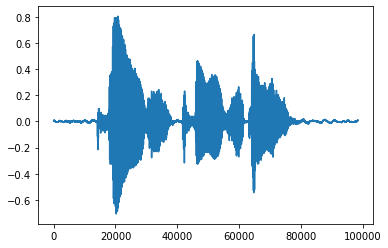

In [17]:
import torch
import torchaudio
import matplotlib.pyplot as plt

# Opening a file
#filename = "../_static/img/steam-train-whistle-daniel_simon-converted-from-mp3.wav"
filename = "/content/drive/My Drive/Colab_files/p225_001.wav"
waveform, sample_rate = torchaudio.load(filename)

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

plt.figure()
plt.plot(waveform.t().numpy())

Shape of spectrogram: torch.Size([1, 201, 493])
Shape of spectrogram: torch.Size([1, 40, 493])


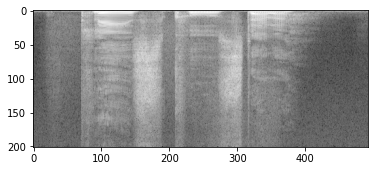

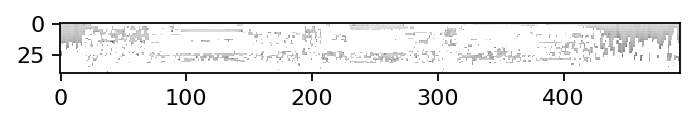

In [29]:
# Transformations
# https://pytorch.org/tutorials/beginner/audio_preprocessing_tutorial.html#transformations

# Spectrogram: Create a spectrogram from a waveform.
specgram = torchaudio.transforms.Spectrogram()(waveform)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
plt.imshow(specgram.log2()[0,:,:].numpy(), cmap='gray')

# MFCC: Create the Mel-frequency cepstrum coefficients from a waveform.
MFCC = torchaudio.transforms.MFCC()(waveform)

print("Shape of spectrogram: {}".format(MFCC.size()))

#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
fig = plt.figure(dpi=160, figsize=(5,2))
plt.imshow(MFCC.log2()[0,:,:].numpy(), cmap='gray')
fig.set_figheight(2)
#fig.set_figwidth(value_width)


Shape of spectrogram: torch.Size([1, 201, 493])


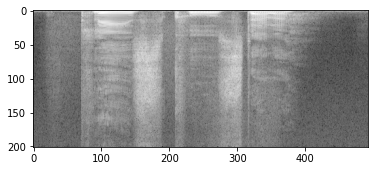

In [30]:
# Mel Spectrogram on a log scale.

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
p = plt.imshow(specgram.log2()[0,:,:].detach().numpy(), cmap='gray')